In [1]:
%%bash
# pip3 install sklearn pandas matplotlib pyclustering

In [2]:

from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# for medoids
# from sklearn_extra.cluster import KMedoids # no way to install
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import time

%matplotlib inline

In [3]:
# Global variables
colors = ['green', 'blue', 'orange', 'red', 'purple', 'yellow', 'cyan', 
          'black', 'pink', 'teal', 'aqua', 'maroon']
markers = ["o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d"]
dfs = []
df = pd.DataFrame()
file_name = 'rawdata10K.dat'

In [4]:
def pre_process_data():
    global df
    # Read csv file
    df = pd.read_csv(file_name, delim_whitespace=True)
    df.columns = ["X", "Y"]
    # Scale data
    scaler = MinMaxScaler()
    df.X = scaler.fit(df[['X']]).transform(df[['X']])
    df.Y = scaler.fit(df[['Y']]).transform(df[['Y']])

In [5]:
def plot_dendrogram():
    global df
    # create dendrogram
    dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

In [6]:
def cluster_hierarchical(k):
    global dfs, df
    dfs = []

    start = time.time()
    hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    y_hc = hc.fit_predict(df)
    # Add cluster column to data
    df['cluster'] = y_hc
    # segregate df per cluster
    for i in range(0,k):
        dfs.append(df[df.cluster==i])
        
    end = time.time()
    print('Agglomerative time: ', end-start)

In [7]:
def plot_clusters(k, save_to_file=True):
    global dfs
    global colors
    global markers
    # Plot it
    for i in range(0, len(dfs)):
        plt.scatter(dfs[i].X, dfs[i].Y, color=colors[i], marker=markers[i], label='cluster ' + str(i))
        
    plt.title('Scatter plot of scaled X, Y using Agglemerative K='+str(k))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    
    if save_to_file:
        plt.savefig('images/scatter-plot-agglemerative-k-'+str(k)+'.png', dpi=300, bbox_inches='tight')
        
    plt.show()

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


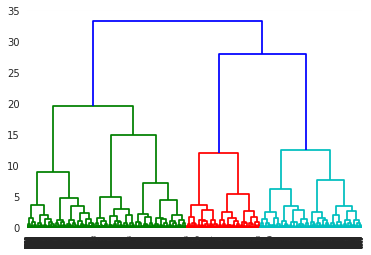

In [8]:

# 1 - preprocess data
pre_process_data()

# 2 - plot dendrogram
plot_dendrogram()



Agglomerative time:  2.1149439811706543


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


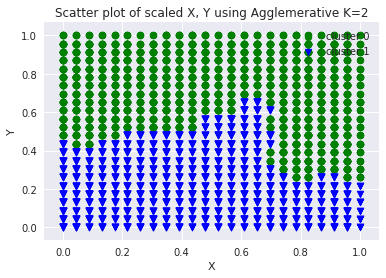

Agglomerative time:  1.9601974487304688


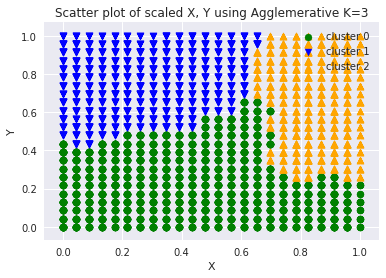

Agglomerative time:  1.954686164855957


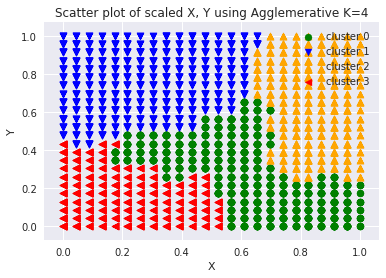

Agglomerative time:  1.9235782623291016


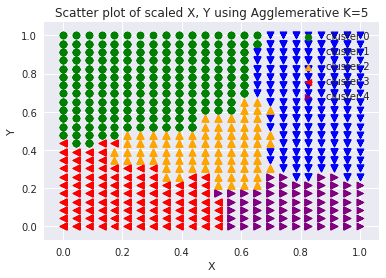

Agglomerative time:  1.9194374084472656


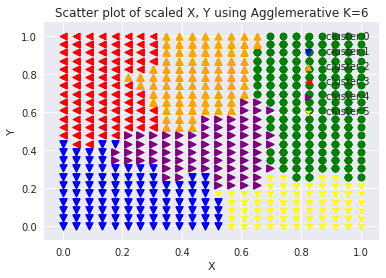

Agglomerative time:  1.9031693935394287


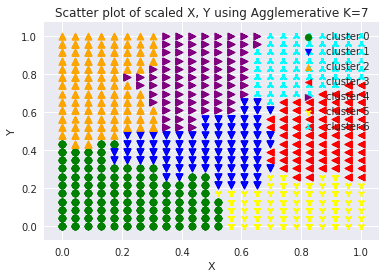

In [9]:
# 3 - do clustering for k and then plot
for k in range(2, 8):
    cluster_hierarchical(k)
    plot_clusters(k)